In [1]:
pip install yfinance

In [3]:
# como siempre comenzamos importando las librerias
import numpy as np
import pandas as pd 
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

In [84]:
#fijamos tamaño de graficas
plt.rcParams['figure.figsize'] = [10, 7.5]

In [85]:
#recuerda instalar yahoo finance con-> pip install yfinance
hrdz = yf.download('HERDEZ.MX', start='2018-01-01', end='2022-03-12', progress=False)

In [86]:
#vemos los ultimos 10 datos
hrdz.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-28,29.620001,29.980000,28.510000,28.920000,28.920000,140519
2022-03-01,28.990000,29.400000,27.500000,27.799999,27.799999,310520
2022-03-02,27.799999,27.799999,27.100000,27.320000,27.320000,1067612
2022-03-03,27.500000,27.680000,26.650000,26.910000,26.910000,318130
2022-03-04,26.879999,26.889999,25.910000,26.420000,26.420000,467297
2022-03-07,26.680000,27.020000,24.370001,24.820000,24.820000,419593
2022-03-08,25.049999,25.500000,24.000000,25.420000,25.420000,1202132
2022-03-09,25.840000,27.799999,25.340000,26.940001,26.940001,499738
2022-03-10,27.000000,27.950001,26.410000,27.750000,27.750000,425186


In [87]:
##Voy renombar columna 'Adj Close' por adj_close 
hrdz.rename(columns = {'Adj Close':'adj_close'}, inplace=True)

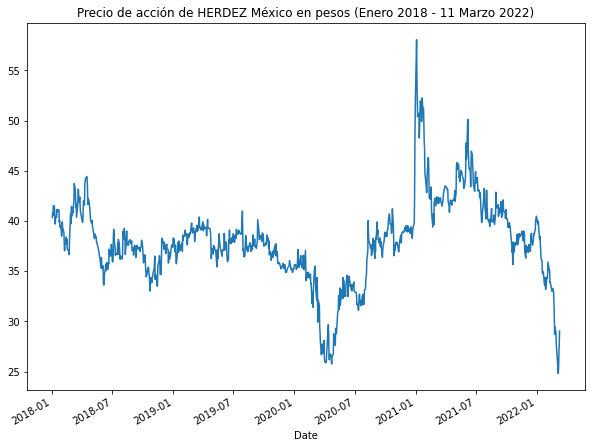

In [88]:
# vamos a graficar
hrdz.adj_close.plot()
plt.title('Precio de acción de HERDEZ México en pesos (Enero 2018 - 11 Marzo 2022)')
plt.show()

In [89]:
#hacemos la prueba de dickey fuller aumentada ADF
adf = adfuller(hrdz['adj_close'])

#presentamos el p-value
print('p-value: %f' % adf[1])

p-value: 0.084142


In [90]:
if adf[1] < 0.05:
    
    print(f'con un un p-value={adf[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria') 


con un un p-value = 0.084
 NO se rechaza hipótesis nula, serie no estacionaria


In [91]:
hrdz_diff = hrdz['adj_close'] - hrdz['adj_close'].shift()

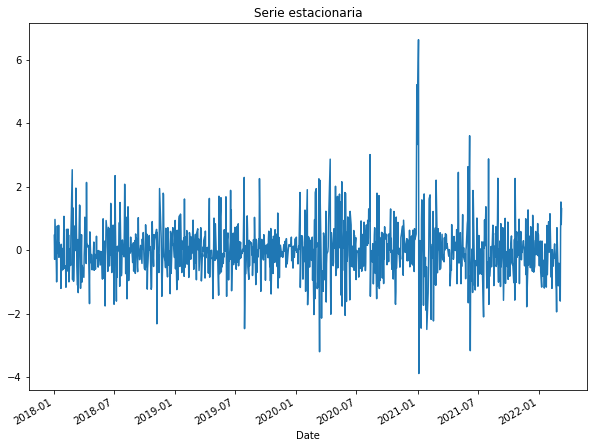

In [97]:
#graficamos el tipo de cambio diferenciado
hrdz_diff.plot()
plt.title('Serie estacionaria')
plt.show()

In [13]:
#eliminamos los Nan
hrdz_diff =hrdz_diff.dropna()

In [14]:
## como la serie tiene saltos (los fines de semana los mercados no abren)
## removeremos la fecha
hrdz_diff = hrdz_diff.reset_index()

### eliminamos columna fecha
hrdz_diff = hrdz_diff.drop(['Date'], axis=1)

In [15]:
hrdz_diff

,adj_close
0,-0.065598
1,0.028111
2,-0.431061
3,-0.009377
4,0.126511
...,...
548,-1.600000
549,0.600000
550,1.520000
551,0.809999


In [16]:
adf1 = adfuller(hrdz_diff)
if adfuller(hrdz_diff)[1] < 0.05:
    
    print(f'con un un p-value={adf1[1]}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf1[1]}\n NO se rechaza hipótesis nula, serie no estacionaria') 


con un un p-value=0.0
 Se rechaza hipótesis nula, serie estacionaria


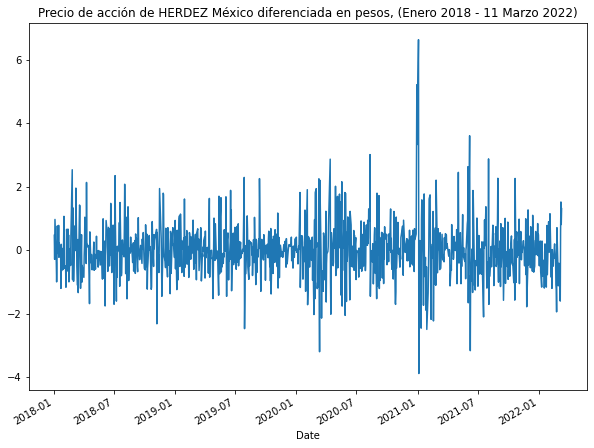

In [94]:
hrdz_diff.plot()
plt.title('Precio de acción de HERDEZ México diferenciada en pesos, (Enero 2018 - 11 Marzo 2022)')
plt.show()

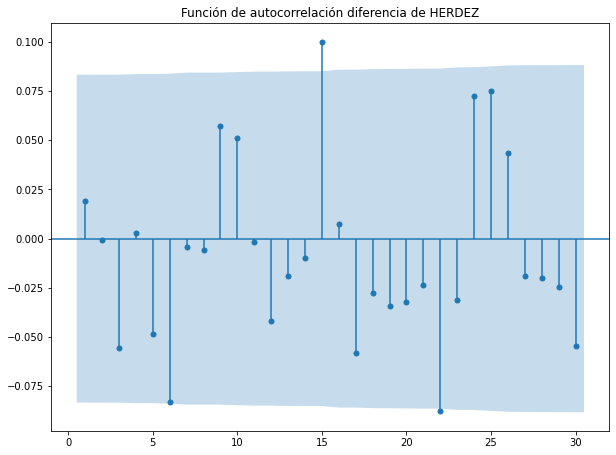

In [17]:
#grafica de autocorrelación ACF
plot_acf(hrdz_diff, zero=False, lags=30)
plt.title('Función de autocorrelación diferencia de HERDEZ')
plt.show()

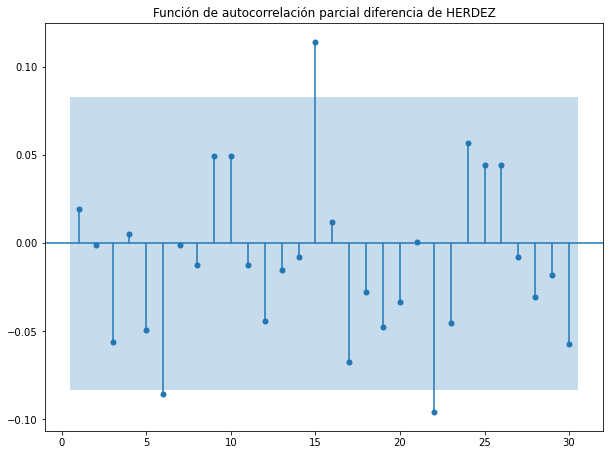

In [18]:
#grafica de autocorrelación parcial PACF
plot_pacf(hrdz_diff, zero=False, lags=30)
plt.title('Función de autocorrelación parcial diferencia de HERDEZ')
plt.show()

In [19]:
# estimamos un ARMA (15,6)
modelo = ARIMA(hrdz_diff, order=(15, 0, 6))
resultado = modelo.fit()
resultado.summary()

C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              adj_close   No. Observations:                  553
Model:                ARIMA(15, 0, 6)   Log Likelihood                -770.504
Date:                Sun, 13 Mar 2022   AIC                           1587.007
Time:                        12:29:37   BIC                           1686.260
Sample:                             0   HQIC                          1625.784
                                - 553                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0116      0.040     -0.293      0.770      -0.090       0.066
ar.L1         -0.2454      1.056     -0.232      0.816      -2.315       1.824
ar.L2         -0.3494      0.765     -0.457      0.648      -1.849       1.150
ar.L3         -0.0330      0.998     -0.033      0.974      -1.988       1.922
ar.L4         -0.1750      0.809     -0.216      0.829      -1.761       1.411
ar.L5          0.3336      0.869      0.384      0.701      -1.370       2.037
ar.L6          0.4781      0.758      0.631      0.528      -1.007       1.964
ar.L7         -0.0751      0.132     -0.571      0.568      -0.333       0.183
ar.L8         -0.0143      0.164     -0.087      0.931      -0.336       0.307
ar.L9          0.0539      0.150      0.360      0.719      -0.239       0.347
ar.L10         0.0477      0.120      0.398      0.691      -0.187       0.282
ar.L11         0.0632      0.091      0.696      0.486      -0.115       0.241
ar.L12         0.0233      0.065      0.358      0.720      -0.104       0.151
ar.L13        -0.0131      0.053     -0.247      0.805      -0.117       0.091
ar.L14        -0.0524      0.055     -0.955      0.340      -0.160       0.055
ar.L15         0.0051      0.071      0.072      0.943      -0.134       0.144
ma.L1          0.2580      1.056      0.244      0.807      -1.812       2.329
ma.L2          0.3743      0.765      0.489      0.625      -1.126       1.874
ma.L3          0.0015      1.022      0.001      0.999      -2.002       2.005
ma.L4          0.1874      0.826      0.227      0.821      -1.432       1.806
ma.L5         -0.4302      0.894     -0.481      0.630      -2.182       1.322
ma.L6         -0.6038      0.824     -0.733      0.463      -2.218       1.010
sigma2         0.9465      0.039     24.413      0.000       0.870       1.022
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               864.53
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
ic = {}
for ar in range(15):
    for ma in range(15):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(hrdz_diff, order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 0, MA: 7
AR: 0, MA: 8
AR: 0, MA: 9
AR: 0, MA: 10
AR: 0, MA: 11
AR: 0, MA: 12
AR: 0, MA: 13
AR: 0, MA: 14
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 1, MA: 7
AR: 1, MA: 8
AR: 1, MA: 9
AR: 1, MA: 10
AR: 1, MA: 11
AR: 1, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 13
AR: 1, MA: 14
AR: 2, MA: 0
AR: 2, MA: 1


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 2


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5
AR: 2, MA: 6
AR: 2, MA: 7
AR: 2, MA: 8


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 9


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 10


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 11


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 13


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 14


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5
AR: 3, MA: 6


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 7


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 8


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 9


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 10


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 11


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 13


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 14


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 5


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 7


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 8


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 9


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 10


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 11


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 13


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 14


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 4


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 5


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 6


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 7


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 8


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 9


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 10


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 11


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 13


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 14


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 4


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 5


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 6


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 7


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 8


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 9


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 10


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 11


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 13


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 14


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 0
AR: 7, MA: 1
AR: 7, MA: 2


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 3


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 4


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 5


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 6


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 7


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 8


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 9


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 10


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 11


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 13


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 7, MA: 14


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 0
AR: 8, MA: 1
AR: 8, MA: 2


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 3


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 4


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 5


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 6


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 7


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 8


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 9


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 10


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 11


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 13


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 8, MA: 14


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 0
AR: 9, MA: 1
AR: 9, MA: 2


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 3


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 4


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 5


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 6


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 7


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 8


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 9


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 10


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 11


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 13


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 9, MA: 14


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 10, MA: 0
AR: 10, MA: 1
AR: 10, MA: 2
AR: 10, MA: 3


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 10, MA: 4


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 10, MA: 5


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 10, MA: 6


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 10, MA: 7


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 10, MA: 8


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 10, MA: 9


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 10, MA: 10


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 10, MA: 11


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 10, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 10, MA: 13


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 10, MA: 14


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 11, MA: 0
AR: 11, MA: 1
AR: 11, MA: 2


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 11, MA: 3


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 11, MA: 4


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 11, MA: 5


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 11, MA: 6


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 11, MA: 7


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 11, MA: 8


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 11, MA: 9


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 11, MA: 10


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 11, MA: 11


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 11, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 11, MA: 13


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 11, MA: 14


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 12, MA: 0
AR: 12, MA: 1
AR: 12, MA: 2
AR: 12, MA: 3


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 12, MA: 4


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 12, MA: 5


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 12, MA: 6


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 12, MA: 7


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 12, MA: 8


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 12, MA: 9


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 12, MA: 10


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 12, MA: 11


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 12, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 12, MA: 13


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 12, MA: 14


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 13, MA: 0
AR: 13, MA: 1
AR: 13, MA: 2


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 13, MA: 3


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 13, MA: 4


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 13, MA: 5


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 13, MA: 6


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 13, MA: 7


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 13, MA: 8


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 13, MA: 9


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 13, MA: 10


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 13, MA: 11


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 13, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 13, MA: 13


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 13, MA: 14


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 14, MA: 0
AR: 14, MA: 1
AR: 14, MA: 2
AR: 14, MA: 3


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 14, MA: 4


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 14, MA: 5


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 14, MA: 6


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 14, MA: 7


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 14, MA: 8


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 14, MA: 9


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 14, MA: 10


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 14, MA: 11


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 14, MA: 12


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 14, MA: 13


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 14, MA: 14


C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC          BIC
AR MA                          
0  0   1572.195159  1580.825875
   1   1573.987804  1586.933878
   2   1575.986697  1593.248129
   3   1575.898635  1597.475425
   4   1577.890737  1603.782885
...            ...          ...
14 10  1589.714496  1701.913804
   11  1585.534051  1702.048717
   12  1588.660069  1709.490093
   13  1586.909064  1712.054446
   14  1588.165062  1717.625803

[225 rows x 2 columns]

In [29]:
ic.sort_values('BIC', ascending = True)

AIC          BIC
AR MA                          
0  0   1572.195159  1580.825875
1  0   1573.987744  1586.933818
0  1   1573.987804  1586.933878
   2   1575.986697  1593.248129
2  0   1575.987046  1593.248478
...            ...          ...
14 12  1588.660069  1709.490093
12 14  1589.085496  1709.915520
13 14  1586.809417  1711.954799
14 13  1586.909064  1712.054446
   14  1588.165062  1717.625803

[225 rows x 2 columns]

In [30]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
7  9   1570.137238  1647.813682
5  2   1570.676298  1609.514520
4  5   1571.547615  1619.016553
5  3   1572.066568  1615.220148
0  0   1572.195159  1580.825875
...            ...          ...
14 1   1589.688186  1663.049272
   10  1589.714496  1701.913804
13 12  1590.045785  1706.560451
11 13  1590.190432  1702.389740
12 13  1591.171229  1707.685895

[225 rows x 2 columns]

In [34]:
# estimamos un ARMA (5,2)
modelo = ARIMA(hrdz_diff, order=(5, 0, 2))
resultado = modelo.fit()
resultado.summary()

C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              adj_close   No. Observations:                  553
Model:                 ARIMA(5, 0, 2)   Log Likelihood                -776.338
Date:                Sun, 13 Mar 2022   AIC                           1570.676
Time:                        13:31:07   BIC                           1609.515
Sample:                             0   HQIC                          1585.850
                                - 553                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0127      0.043     -0.297      0.767      -0.096       0.071
ar.L1          1.2987      0.039     33.121      0.000       1.222       1.376
ar.L2         -0.9633      0.055    -17.473      0.000      -1.071      -0.855
ar.L3         -0.0371      0.061     -0.608      0.543      -0.157       0.083
ar.L4          0.0563      0.064      0.880      0.379      -0.069       0.182
ar.L5         -0.0777      0.039     -2.003      0.045      -0.154      -0.002
ma.L1         -1.2972      0.027    -48.784      0.000      -1.349      -1.245
ma.L2          0.9616      0.028     34.607      0.000       0.907       1.016
sigma2         0.9691      0.036     27.046      0.000       0.899       1.039
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               894.95
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.98
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
# estimamos un ARIMA (5,2)
modelo2 = ARIMA(hrdz['adj_close'], order=(5, 1, 2))
resultado2 = modelo2.fit()
resultado2.summary()

C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-package

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              adj_close   No. Observations:                  554
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -777.409
Date:                Sun, 13 Mar 2022   AIC                           1570.819
Time:                        13:33:24   BIC                           1605.341
Sample:                             0   HQIC                          1584.306
                                - 554                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9349      0.072     13.052      0.000       0.795       1.075
ar.L2         -0.8992      0.081    -11.167      0.000      -1.057      -0.741
ar.L3         -0.0389      0.051     -0.770      0.441      -0.138       0.060
ar.L4          0.0795      0.056      1.428      0.153      -0.030       0.189
ar.L5         -0.1153      0.042     -2.717      0.007      -0.199      -0.032
ma.L1         -0.9232      0.068    -13.639      0.000      -1.056      -0.791
ma.L2          0.8968      0.069     12.938      0.000       0.761       1.033
sigma2         0.9735      0.035     28.135      0.000       0.906       1.041
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               897.70
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# vamos a estimar la serie con el modelo ARIMA
hrdz['pronostico'] = resultado2.predict()
hrdz['pronostico'][0] = hrdz['adj_close'][0]

C:\Users\DENISS~1.LAP\AppData\Local\Temp/ipykernel_50472/3966285023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hrdz['pronostico'][0] = hrdz['adj_close'][0]


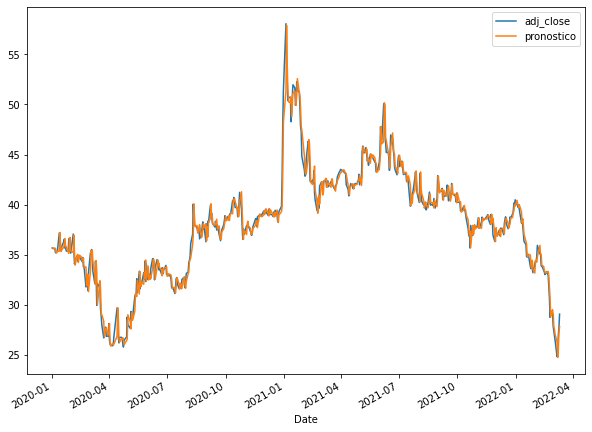

In [38]:
hrdz[['adj_close', 'pronostico']].plot()
plt.show()

In [40]:
#calculamos cuantas observaciones tenemos para hacer nuestra predicción
len(hrdz)

554

In [41]:
## vamos a pronosticar esos días
resultado2.predict(555, 557)

C:\Users\Denisse Cardona.LAPTOP-52N9E396\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


555    29.115997
556    28.913867
557    28.728637
Name: predicted_mean, dtype: float64

In [ ]:
#Mi pronostico para el dia lunes 14 de marzo es que la accion
# de HERDEZ tenga un recio de cierre ajustado de 29.115997